# Introduction

Welcome!

In this notebook, we will dive into designing a Single Layer, Single Output Perceptron from scratch 

We will be addressing the following question : 

NOTE - Do not use inbuilt functions for perceptron.

* Implement the Perceptron algorithm from scratch in Python.
* Initialize the weights with [0 0 0] and a learning rate of 0.0001.
* For each iteration, calculate the output of the Perceptron for each input in the training set.
* Use MSE to computer the error for all samples
* Update the weights using the gradient descent procedure.
* Repeat the above steps until the Perceptron converges or a maximum number of iterations is reached.
* Test the trained Perceptron on a separate test set.
* Use the step function as an activation function in the output layer


Use the IRIS Dataset for the above, considering all the four features : sepal length, sepal width, petal length, and petal width, but only two classes -  Setosa, Versicolor.  Drop the feature vectors of the other class. 


In [1]:
#importing the necessary libraries

import numpy as np 
import pandas as pd 

# Preparing the Data

In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
print(f"Sample data \n{df.head()}")
print(f"Information about the dataset \n{df.info()}")
print(f"Does dataset contain NULL values?\n{df.isnull().sum()}")

Sample data 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Informa

In [3]:
#dropping off the ID column since we dont need it
df = df.drop(['Id'] , axis = 1)

In [4]:
#getting the classes starting indices, and counts
classes, classes_index,class_counts = np.unique(df['Species'].to_numpy(), return_index=True, return_counts=True)
classes, classes_index, class_counts

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([  0,  50, 100]),
 array([50, 50, 50]))

In [5]:
#Getting the dataset ready 
#We will consider all the features : :sepal length, speal width, petal length, petal width
#we will consider Iris-setos and Iris-versicolor CLASSES 
#I'm going to use 80% of the data for training and rest of the 20% for testing
#creating separate dfs for each class
setosa = df.iloc[:classes_index[1]]
versicolor = df.iloc[classes_index[1]:classes_index[2]]

#separating the class features and class labels, to create a matrix of feature vectors 
setosa_x = setosa.drop(['Species'], axis = 1)
versicolor_x = versicolor.drop(['Species'], axis = 1)


#initialising numpy arrays with ones and 0s
setosa_y =  np.zeros(50)
versicolor_y = np.ones(50)
#encoding the sepcies column with setosa as 0 and versicolor as 1 and adding it to the original dataframes for modifying bias during training
setosa_x['label'] = setosa_y
versicolor_x['label'] = versicolor_y


#splitting the data into training and testing 
ind = int(0.8*class_counts[0])
X_train_df = pd.concat([setosa_x.iloc[:ind], versicolor_x.iloc[:ind]], ignore_index=True)
X_test_df = pd.concat([setosa_x.iloc[ind:] , versicolor_x.iloc[ind:]], ignore_index=True)
y_train_df = pd.concat([setosa_x['label'].iloc[:ind], versicolor_x['label'].iloc[:ind]], ignore_index = True)
y_test_df = pd.concat([setosa_x['label'].iloc[ind:], versicolor_x['label'].iloc[ind:]], ignore_index=  True)

X_test_df = X_test_df.drop(['label'] , axis = 1)

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df.values
y_test = y_test_df.values

# Training Phase

In [6]:
#activation function / step function 
def step_activaion(num):
    if num >= 0:
        return 1
    else:
        return 0

![https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40ilyurek%2Fperceptron-model-the-foundation-of-neural-networks-4db25b0148d&psig=AOvVaw0pM__YLVANHcf_8NFV_w8s&ust=1707358593535000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCJjAh8eUmIQDFQAAAAAdAAAAABAD](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40ilyurek%2Fperceptron-model-the-foundation-of-neural-networks-4db25b0148d&psig=AOvVaw0pM__YLVANHcf_8NFV_w8s&ust=1707358593535000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCJjAh8eUmIQDFQAAAAAdAAAAABAD)
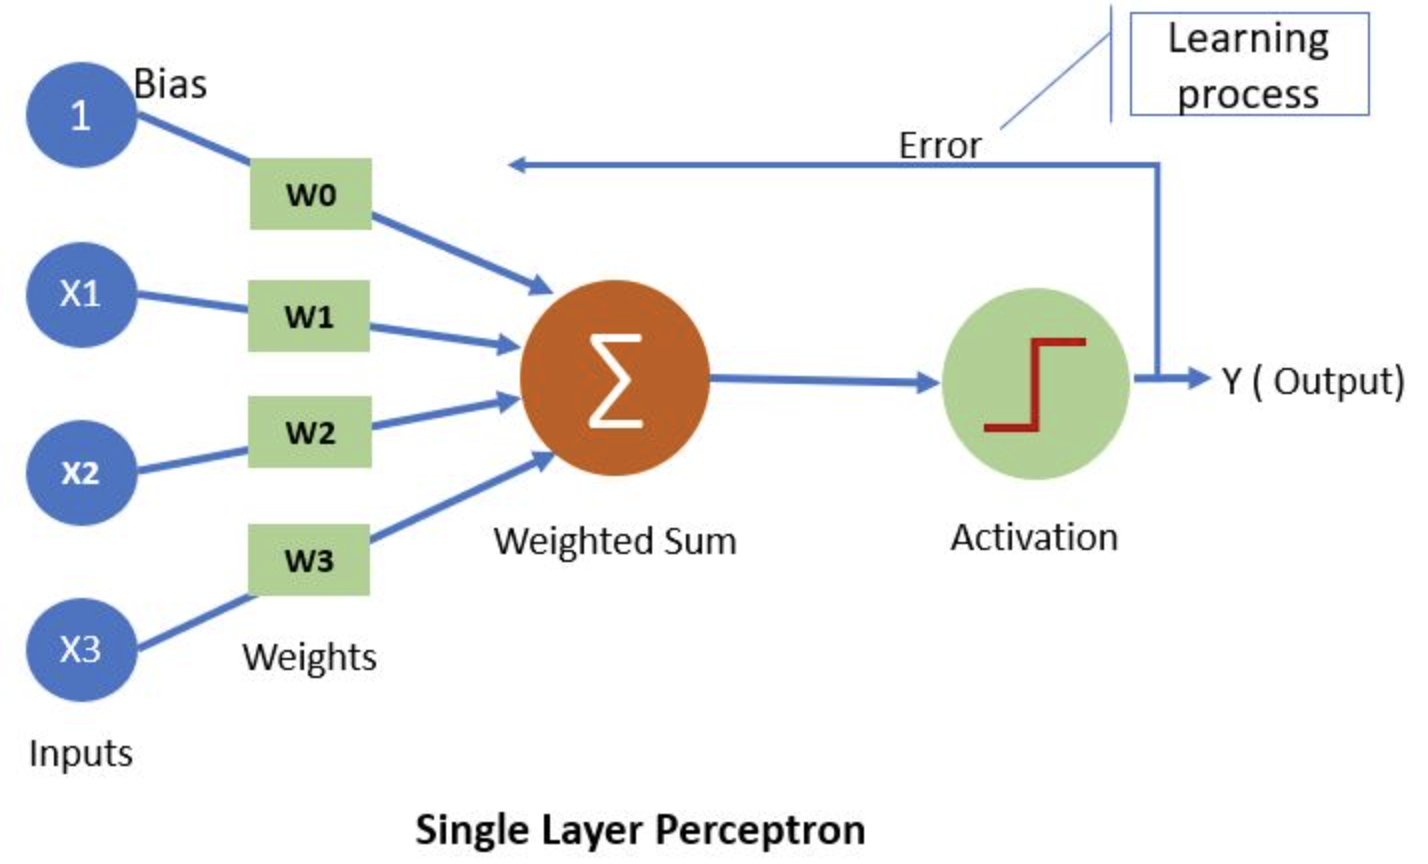

In [7]:

#single layer single output with step activaion function and min squared error
#weight sum and then step activation, squared error is used in gradient descent to modify the weight vector

#training
#initialising the weights to 0 and bias to 0, creating the modified weight vector a 
a = np.array([0, 0, 0, 0, 0])

#setting the learning rate
learning_rate = 0.0001

#defining the maximum number of iterations 
epochs = 500

a_old = a

number_of_epochs_run = 0
#training loop
for epoch in range(epochs):
    error = 0.0
    for i in range(0, len(X_train)):
        #computing the y_pred
        y_pred = step_activaion(np.dot(a.T , X_train[i]))
        #computing mean squared error 
        error += (y_pred - y_train[i])**2
        #updating the weight vector using learning_rate * dE/dWeight * X_i
        #dE / dWeight  == (y_hat - y_actual)
        a = a - learning_rate*(y_pred - y_train[i])*X_train[i]
    
    #break if modified weights has converged 
    print(f"Loss for epoch {epoch + 1} : {error}")
    number_of_epochs_run += 1
    if np.array_equal(a_old, a):
        break
    else:
        a_old = a
       
print(f"number of epochs run: {number_of_epochs_run}")
print(f"modified weight vector after training: {a}")

Loss for epoch 1 : 2.0
Loss for epoch 2 : 2.0
Loss for epoch 3 : 1.0
Loss for epoch 4 : 0.0
number of epochs run: 4
modified weight vector after training: [-0.00013 -0.00041  0.00052  0.00022  0.0002 ]


# Testing Phase

In [8]:
#testing the model 

#separating the weights and bias 
w = a[:4]
b = a[4]

prediction = []
number_of_correctly_classified = 0

#testing loop : 
for j in range(len(X_test)):
    y_pred = step_activaion(np.dot(w.T, X_test[j]) + b)
    prediction.append(y_pred)
    if y_pred == y_test[j]:
        number_of_correctly_classified += 1

print(f"Number of samples: {len(X_test)}")   
print(f"Number of correctly classified samples: {number_of_correctly_classified}")
print(f"Accuracy: {(number_of_correctly_classified / len(X_test)) * 100}%")

Number of samples: 20
Number of correctly classified samples: 20
Accuracy: 100.0%
